In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

In [3]:
np.linalg.norm(np.array([8,10]) - np.array([3,10.5]))       # Esta linea calcula la distancia euclideana entre los 2 puntos

np.float64(5.024937810560445)

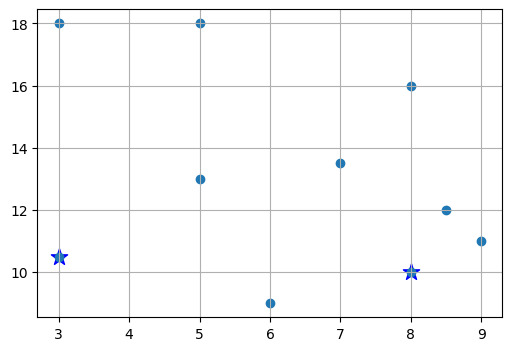

In [4]:
data = np.array([[8,10],[3,10.5],[7,13.5],[5,18],[5,13],[6,9],[9,11],[3,18],[8.5,12],[8,16]])
C = np.array([[8,10],[3,10.5]])
# Gráfica
plt.scatter(C[:,0],C[:,1], marker='*', s=150,c='b') # Centroides
plt.scatter(data[:,0],data[:,1]) # Datos

In [5]:
def dist(a, b):
  return np.linalg.norm(a[:,np.newaxis]-b,axis=2)       # Esta linea calcula la distancia euclideana entre los 2 puntos

In [6]:
x = np.array([[8,10]])
y = np.array([3,10.5])
dist(x, y)

array([[5.02493781]])

In [7]:
# Asignar puntos a cada grupo
distances = dist(data, C)
grupos = np.argmin(distances, axis=1)

grupos, distances

(array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0]),
 array([[0.        , 5.02493781],
        [5.02493781, 0.        ],
        [3.64005494, 5.        ],
        [8.54400375, 7.76208735],
        [4.24264069, 3.20156212],
        [2.23606798, 3.35410197],
        [1.41421356, 6.02079729],
        [9.43398113, 7.5       ],
        [2.06155281, 5.70087713],
        [6.        , 7.43303437]]))

In [8]:
# Actualizar centroides
for i in range(len(C)):
    puntos=[data[j] for j in range(len(data)) if grupos[j]==i]
    # print(i,np.array(puntos))
    C[i] = np.mean(puntos,axis=0)
print(C)

[[ 7.75       11.91666667]
 [ 4.         14.875     ]]


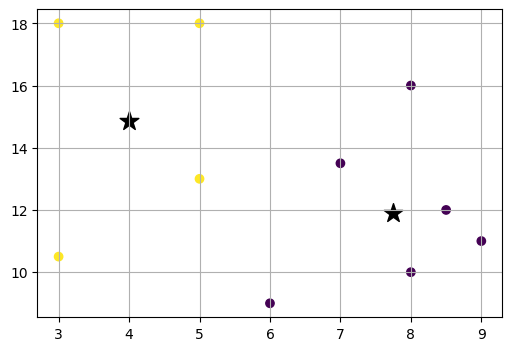

In [9]:
# Gráfica
plt.scatter(C[:,0], C[:,1], marker='*', s=200, c='k')
plt.scatter(data[:,0], data[:,1], c=grupos)

Nota como mejoro la posicion de los centros, de manera resumida lo que pasa es lo siguiente:

1. Coloca los centroides en alguno de los puntos de tu array, conviene utilizar 2 puntos "buenos"
2. Calcula las distancias de cada punto al centroide
3. Crea grupos para asignar cada punto a un centroide
4. Para cada centroide, checa la media de las coordenadas de su grupo y reajusta el centroide a esta coordenada
5. Repite desde el 2 hasta el 4 hasta que no haya cambio significativo

In [10]:
''' scikit-learn '''
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (6,4)
plt.style.use('ggplot')

In [11]:
# Conjunto de datos xclara
data = pd.read_csv('https://bit.ly/3BxsIDR')
print(data.shape)
data.head()

(3000, 3)


,rownames,V1,V2
0,1,2.072345,-3.241693
1,2,17.936710,15.784810
2,3,1.083576,7.319176
3,4,11.120670,14.406780
4,5,23.711550,2.557729


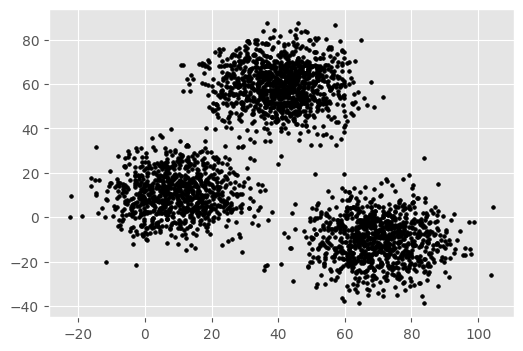

In [12]:
# Gráfica
x1 = data['V1'].values
x2 = data.V2.values
X = np.array(list(zip(x1,x2)))
plt.scatter(X[:,0], X[:,1], c='black', s=7)
# print(X)

In [13]:
from sklearn.cluster import KMeans
# Número de grupos
n=3
km = KMeans(n_clusters=n)
# Ajuste
km = km.fit(X)
# Etiquetas de cada clase
y = km.predict(X)
# Centroides
C_ = km.cluster_centers_
# print(km)

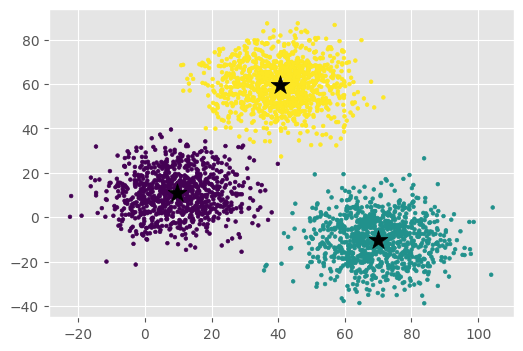

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=7)
plt.scatter(C_[:, 0], C_[:, 1], marker='*', s=200, c='k')

In [15]:
# Ejemplo 3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
plt.rcParams['figure.figsize'] = (9, 6)
# 4 nubes de puntos de 3D
X, y = make_blobs(n_samples=800, n_features=3, centers=4, random_state=42)

In [16]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans = kmeans.fit(X)
y = kmeans.predict(X)
C = kmeans.cluster_centers_

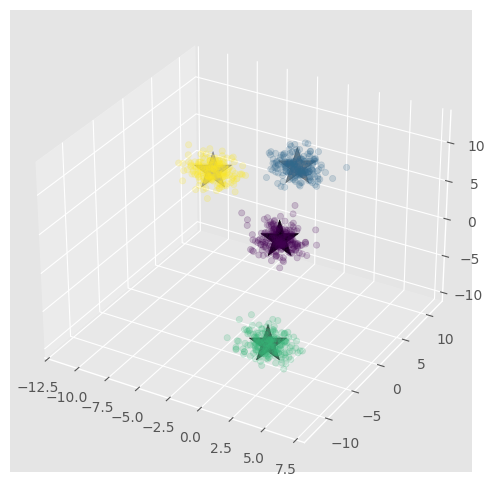

In [17]:
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.scatter(X[:,0],X[:,1],X[:,2], c=y, alpha=0.2)
ax.scatter(C[:,0],C[:,1],C[:,2], marker='*' ,c='k', s=800)
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.DataFrame(X, columns=['x', 'y', 'z'])
df['cluster'] = y

fig = px.scatter_3d(df, x='x', y='y', z='z', color='cluster', opacity=0.5)

for i in range(len(C)):
    fig.add_scatter3d(
        x=[C[i,0]], 
        y=[C[i,1]], 
        z=[C[i,2]], 
        mode='markers',
        marker=dict(
            symbol='diamond',
            size=15,
            color='black',
            line=dict(width=1, color='black')
        ),
        name=f'Centroid {i}'
    )
fig.show()

In [38]:
# ¿Cómo saber el valor inicial para K? => Gráfica del codo
# Importamos bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns; sns.set()  # Para el estilo de los gráficos

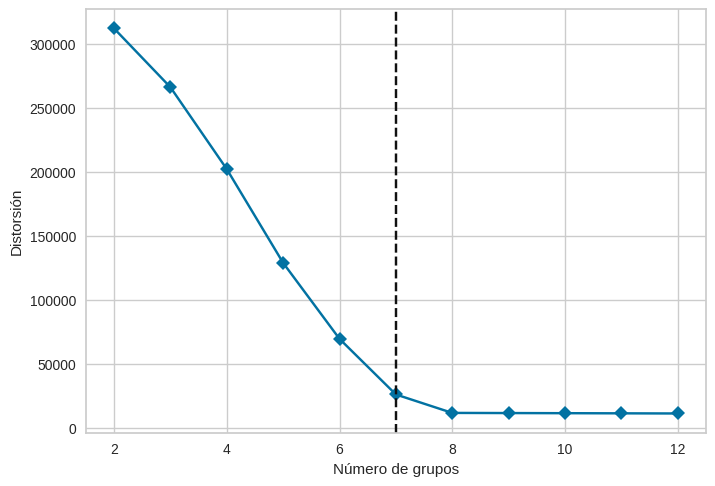

In [44]:
# Elección de k con la gráfica de codo KElbowVisualizer
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
# Por omisión la métrica es "distortion", que es la suma de las
# distancias cuadráticas de cada punto con el centro de su grupo
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

vis = KElbowVisualizer(KMeans(random_state=42),k=12,timings=False)
vis.fit(X)
plt.xlabel('Número de grupos')
plt.ylabel('Distorsión')
plt.show()

In [ ]:
# KMeans in depth
# https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb